In [1]:
import sys
sys.path.append('..')

In [2]:
import os
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import json

In [28]:
from DomainPrediction.utils import helper
from DomainPrediction.utils.constants import *

In [4]:
root = '../..'
data_path = os.path.join(root, 'Data/round_2_exp/ll_guidance')

In [5]:
filename = os.path.join(data_path, 'likelihood_db_prob.json')
if os.path.isfile(filename):
    with open(filename) as f:
        likelihood_prob = json.load(f)

filename = os.path.join(data_path, 'likelihood_db.json')
if os.path.isfile(filename):
    with open(filename) as f:
        likelihood_ll = json.load(f)

likelihood_db = {**likelihood_prob, **likelihood_ll}

In [6]:
fasta_file = os.path.join(data_path, 'll_improve.fasta')
start_wt_ll_guided = helper.read_fasta(fasta_file)
fasta_file = os.path.join(data_path, 'll_prob_improve.fasta')
start_wt_prob_guided = helper.read_fasta(fasta_file)

In [14]:
fasta_file = os.path.join(data_path, 'll_improve_start_r1_best.fasta')
start_r1_best_ll_guided = helper.read_fasta(fasta_file)
fasta_file = os.path.join(data_path, 'll_prob_improve_start_r1_best.fasta')
start_r1_best_prob_guided = helper.read_fasta(fasta_file)

In [15]:
len(start_wt_ll_guided), len(start_wt_prob_guided), len(start_r1_best_ll_guided), len(start_r1_best_prob_guided)

(37, 70, 27, 50)

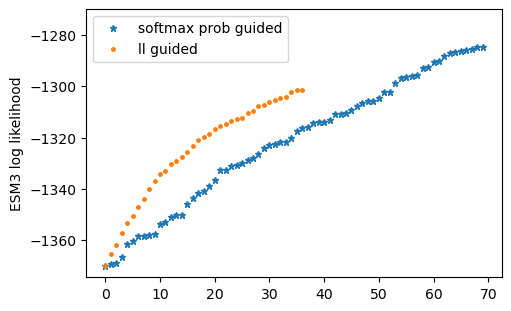

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(5, 3), layout='constrained')

ll_values = [likelihood_db[str(rec.seq)] for rec in start_wt_prob_guided]
ax.plot(ll_values, marker='*', ls='', ms=5, label='softmax prob guided')

ll_values = [likelihood_db[str(rec.seq)] for rec in start_wt_ll_guided]
ax.plot(ll_values, marker='.', ls='', ms=5, label='ll guided')

ax.legend()
ax.set_ylim(top=-1270)
ax.set_ylabel('ESM3 log likelihood')

plt.show()

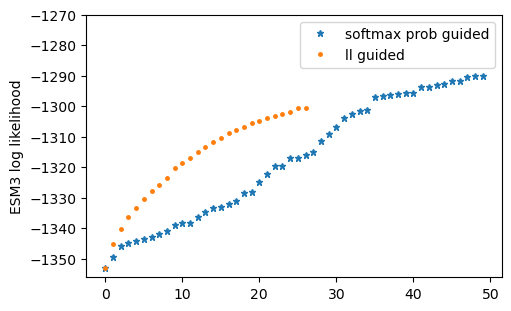

In [17]:
fig, ax = plt.subplots(1, 1, figsize=(5, 3), layout='constrained')

ll_values = [likelihood_db[str(rec.seq)] for rec in start_r1_best_prob_guided]
ax.plot(ll_values, marker='*', ls='', ms=5, label='softmax prob guided')

ll_values = [likelihood_db[str(rec.seq)] for rec in start_r1_best_ll_guided]
ax.plot(ll_values, marker='.', ls='', ms=5, label='ll guided')

ax.legend()
ax.set_ylim(top=-1270)
ax.set_ylabel('ESM3 log likelihood')

plt.show()

In [18]:
set([str(rec.seq) for rec in start_wt_ll_guided]) & set([str(rec.seq) for rec in start_wt_prob_guided])

{'VCVHQLFEQQIEKTPDAIAVIYENQTLSYAELNARANRLAHQLIALGVAPDQRVAICVTRSLARIIGLLAVLKAGGAYVPLDPAYPGERLAYMLTDATPVILMADNVGRAALSEDILATLTVLDPNTLLEQPDHNPQVSGLTPQHLAYVIYTSGSTGRPKGVMIEHRSVVNLTLTQITQFDVCATSRMLQFASFGFDASVWEIMMALSCGAMLVIPTETVRQDPQRLWRYLEEQAITHACLTPAMFHDGTDLPAIAIKPTLIFAGEAPSPALFQALCSRADLFNAYGPTEITVCATTWDCPADYTGGVIPIGSPVANKRLYLLDEHRQPVPLGTVGELYIGGVGVARGYLNRPELTAERFLNDPFSDETNARMYRAGDLARYLPDGNLVFVGRNDQQVKIRGFRIEPGEIEARLVEHSEVSEALVLALGDGQDKRLVAYVVALADDGLATKLREHLSDILPDYMIPAAFVRLDAFPLTPNGKLDRRSLPAPGEDAFARQAYQAPQGEIEIALATIWRELLNVEQVGRHDSFFALGGHSLLAVRMIERLRRIGLGLSVQTLFQHPTLSVLAQSLVPHREISVPDNGITADTTVLTPAMLPLIDLTQAEIDRIVEQVPGGIANIQDIYALSPLQDGILFHHLLANEGDPYLLITQQAFADRPLLNRYLAAVQQVVDRHDILRTAFIWEGLSVPAQVICRQAPLSVTELTLNPADGAISNQLAQRFDPRRHRIDLNQAPLLRFVVAQESDGRWILLQLLHHLIGDHTTLEVMNSEVQACLLGQMDSLPAPVPFRHLVAQARQGVSQAEHTRFFTDMLAEVDEPTLLFGLAEAHHDGSQVTESHRMLTAGLNERLRGQARRLGVSVAALCHLAWAQVLSRTSGQTQVVFGTVLFGRMQAGEGSDSGMGLFINTLPLRLDIDNTPVRDSVRAAHSRLAGLLEHEHASLALAQRCSGVESGTPLFNALLNYRHNTQPVTPDEIVSGIEFLGAQERTNYPFVLSV

In [19]:
set([str(rec.seq) for rec in start_r1_best_ll_guided]) & set([str(rec.seq) for rec in start_r1_best_prob_guided])

{'VCVHQLFEQQIEKTPDAIAVIYENQTLSYAELNARANRLAHQLIALGVAPDQRVAICVTRSLARIIGLLAVLKAGGAYVPLDPAYPGERLAYMLTDATPVILMADNVGRAALSEDILATLTVLDPNTLLEQPDHNPQVSGLTPQHLAYVIYTSGSTGRPKGVMIEHRSVVNLTLTQITQFDVCATSRMLQFASFGFDASVWEIMMALSCGAMLVIPTETVRQDPQRLWRYLEEQAITHACLTPAMFHDGTDLPAIAIKPTLIFAGEAPSPALFQALCSRADLFNAYGPTEITVCATTWDCPADYTGGVIPIGSPVANKRLYLLDEHRQPVPLGTVGELYIGGVGVARGYLNRPELTAERFLNDPFSDETNARMYRAGDLARYLPDGNLVFVGRNDQQVKIRGFRIEPGEIEARLVEHSEVSEALVLALGDGQDKRLVAYVVALADDGLATKLREHLSDILPDYMIPAAFVRLDAFPLTPNGKLDRRSLPAPSEDAYPRATYEAPEGETEQLLAGIWMDLLQVDRVGRHDSFFELGGHSLLAVRLLGRLRQHGLGLQMRDLFEAPVLAELATRLRPYQPLEVPANGITPDTTVLTPEMLPLVTLSQAEIDRIVEQVPGGIANIQDIYALSPLQDGILFHHLLANEGDPYLLITQQAFADRPLLNRYLAAVQQVVDRHDILRTAFIWEGLSVPAQVICRQAPLSVTELTLNPADGAISNQLAQRFDPRRHRIDLNQAPLLRFVVAQESDGRWILLQLLHHLIGDHTTLEVMNSEVQACLLGQMDSLPAPVPFRHLVAQARQGVSQAEHTRFFTDMLAEVDEPTLLFGLAEAHHDGSQVTESHRMLTAGLNERLRGQARRLGVSVAALCHLAWAQVLSRTSGQTQVVFGTVLFGRMQAGEGSDSGMGLFINTLPLRLDIDNTPVRDSVRAAHSRLAGLLEHEHASLALAQRCSGVESGTPLFNALLNYRHNTQPVTPDEIVSGIEFLGAQERTNYPFVLSV

In [20]:
def get_mutations(start, end, display=False):
    count_mut = 0
    for i, (aa_i, aa_j) in enumerate(zip(start, end)):
        if aa_i != aa_j:
            count_mut += 1
            if display:
                print(f'mutation at rel {i} from {aa_i} to {aa_j}')

    return count_mut

In [21]:
assert get_mutations(str(start_wt_ll_guided[-2].seq), str(start_wt_ll_guided[-1].seq)) == 0
assert get_mutations(str(start_wt_prob_guided[-2].seq), str(start_wt_prob_guided[-1].seq)) == 0

assert get_mutations(str(start_r1_best_ll_guided[-2].seq), str(start_r1_best_ll_guided[-1].seq)) == 0
assert get_mutations(str(start_r1_best_prob_guided[-2].seq), str(start_r1_best_prob_guided[-1].seq)) == 0

In [22]:
print(f'num muatations {get_mutations(str(start_wt_ll_guided[0].seq), str(start_wt_ll_guided[-1].seq))}')

num muatations 34


In [23]:
print(f'num muatations {get_mutations(str(start_wt_prob_guided[0].seq), str(start_wt_prob_guided[-1].seq))}')

num muatations 59


In [24]:
print(f'num muatations {get_mutations(str(start_r1_best_ll_guided[0].seq), str(start_r1_best_ll_guided[-1].seq))}')

num muatations 25


In [25]:
print(f'num muatations {get_mutations(str(start_r1_best_prob_guided[0].seq), str(start_r1_best_prob_guided[-1].seq))}')

num muatations 44


In [31]:
records = helper.read_fasta(os.path.join(data_path, 'check.fasta'))
seq_dict = {}
for rec in records:
    T_domain_linker = ''.join([str(rec.seq)[i] for i in range(len(str(rec.seq))) if i not in A_gxps_atc + C_gxps_atc])
    seq_dict[rec.id] = T_domain_linker

helper.create_fasta(sequences=seq_dict, file=os.path.join(data_path, 'check.T.fasta'))